# Activity 2.2 - Transfer Learning


#### Objective(s):

This activity aims to introduce how to apply transfer learning


#### Intended Learning Outcomes (ILOs):

- Demonstrate how to build and train neural network
- Demonstrate how to apply transfer learning in neural network


#### Resources:

- Jupyter Notebook
- CIFAR-10 dataset


#### Procedures

Load the necessary libraries


In [2]:
from __future__ import print_function

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Set the parameters


In [3]:
now = datetime.datetime.now
batch_size = 128
num_classes = 5
epochs = 5
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

Set how the input data is loaded


In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

- Write a function to include all the training steps.
- Use the model, training set, test set and number of classes as function parameters


In [5]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    training_time = now() - t
    print('Training time: %s' % training_time)

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    return history, score, training_time

Shuffle and split the data between train and test sets


In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Create two datasets

- one with digits below 5
- one with 5 and above


In [7]:
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

- Define the feature layers that will used for transfer learning
- Freeze these layers during fine-tuning process


In [8]:
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

Define the classification layers


In [9]:
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

Create a model by combining the feature layers and classification layers


In [10]:
model = Sequential(feature_layers + classification_layers)

Check the model summary


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                        

Train the model on the digits 5,6,7,8,9


In [12]:
hist, score, model_time = train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples



Epoch 1/5


230/230 [==============================] - 24s 97ms/step - loss: 1.6023 - accuracy: 0.2377 - val_loss: 1.5833 - val_accuracy: 0.3174
Epoch 2/5
230/230 [==============================] - 23s 101ms/step - loss: 1.5781 - accuracy: 0.3014 - val_loss: 1.5557 - val_accuracy: 0.5246
Epoch 3/5
230/230 [==============================] - 23s 98ms/step - loss: 1.5524 - accuracy: 0.3763 - val_loss: 1.5262 - val_accuracy: 0.6795
Epoch 4/5
230/230 [==============================] - 23s 98ms/step - loss: 1.5225 - accuracy: 0.4588 - val_loss: 1.4928 - val_accuracy: 0.7531
Epoch 5/5
230/230 [==============================] - 23s 100ms/step - loss: 1.4899 - accuracy: 0.5181 - val_loss: 1.4541 - val_accuracy: 0.7858
Training time: 0:01:55.304776
Test score: 1.4540724754333496
Test accuracy: 0.7858465313911438


Freeze only the feature layers


In [13]:
for l in feature_layers:
    l.trainable = False

Check again the summary and observe the parameters from the previous model


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                        

Train again the model using the 0 to 4 digits


In [15]:
hist_1, score_1, model_time_1 = train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples


Epoch 1/5
240/240 [==============================] - 12s 46ms/step - loss: 1.5802 - accuracy: 0.2705 - val_loss: 1.5502 - val_accuracy: 0.3874
Epoch 2/5
240/240 [==============================] - 11s 44ms/step - loss: 1.5392 - accuracy: 0.3565 - val_loss: 1.5043 - val_accuracy: 0.5120
Epoch 3/5
240/240 [==============================] - 11s 45ms/step - loss: 1.4976 - accuracy: 0.4346 - val_loss: 1.4597 - val_accuracy: 0.6089
Epoch 4/5
240/240 [==============================] - 11s 45ms/step - loss: 1.4567 - accuracy: 0.5072 - val_loss: 1.4163 - val_accuracy: 0.7007
Epoch 5/5
240/240 [==============================] - 11s 46ms/step - loss: 1.4172 - accuracy: 0.5667 - val_loss: 1.3740 - val_accuracy: 0.7762
Training time: 0:00:55.298228
Test score: 1.3740018606185913
Test accuracy: 0.7762210369110107


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc

def plot_loss_accuracy(history,main_title='Metrics'):
    fig = plt.figure(figsize=(12, 6))
    fig.suptitle(main_title, fontsize=16)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross Entropy Loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

def display_roc(roc_auc , fpr, tpr, class_num, model_name=''):
    plt.figure(figsize=(10, 6))
    for i in range(class_num):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')                                                                                                                   
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

def plot_multiclass_roc(model, x_test, y_test, class_num, model_name='', show=True):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_test = keras.utils.to_categorical(y_test, class_num)


    y_pred = model.predict(x_test).astype('float32')
    print(y_test.shape)
    print(y_pred.shape)
    for i in range(class_num):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    if show:    display_roc(roc_auc,fpr,tpr,class_num,model_name)
    else: return roc_auc

#### Supplementary Activity

Now write code to reverse this training process. That is, you will train on the digits 0-4, and then finetune only the last layers on the digits 5-9.


In [17]:
filters = 32
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

conv_layer = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.3),
    Flatten(),
]
model_1 = Sequential(feature_layers + classification_layers, name='HOA2_2_Model1')
model_1.summary()

Model: "HOA2_2_Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_4 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 32)        0         
                                                     

I rerun the code from above to create the identical model and named it.


In [18]:
hist1_1, score1_1, model1_time_1 = train_model(model_1,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/5
240/240 [==============================] - 26s 103ms/step - loss: 1.5903 - accuracy: 0.2283 - val_loss: 1.5704 - val_accuracy: 0.2929
Epoch 2/5
240/240 [==============================] - 24s 99ms/step - loss: 1.5639 - accuracy: 0.2916 - val_loss: 1.5410 - val_accuracy: 0.4172
Epoch 3/5
240/240 [==============================] - 24s 101ms/step - loss: 1.5343 - accuracy: 0.3634 - val_loss: 1.5083 - val_accuracy: 0.5503
Epoch 4/5
240/240 [==============================] - 25s 106ms/step - loss: 1.5028 - accuracy: 0.4274 - val_loss: 1.4711 - val_accuracy: 0.6474
Epoch 5/5
240/240 [==============================] - 28s 117ms/step - loss: 1.4674 - accuracy: 0.4852 - val_loss: 1.4281 - val_accuracy: 0.7161
Training time: 0:02:07.909754
Test score: 1.4280613660812378
Test accuracy: 0.7160926461219788


The model from the procedure is firstly trained with numbers above and equal to five. It took over two minutes to finish training the model. It got a test score of 1.43 and accuracy of 72%.

This time for Model_1, I only trained it using digits less than 5 by making the layers untrainable and only selecting the appropriate rows for training.


In [19]:
for layer in feature_layers:
    layer.trainable = False
model_1.summary()

Model: "HOA2_2_Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_4 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 32)        0         
                                                     

In [20]:
hist1_2, score1_2, model1_time_2 = train_model(model_1,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples


Epoch 1/5
230/230 [==============================] - 12s 47ms/step - loss: 1.6137 - accuracy: 0.2281 - val_loss: 1.5944 - val_accuracy: 0.3088
Epoch 2/5
230/230 [==============================] - 10s 45ms/step - loss: 1.5871 - accuracy: 0.2712 - val_loss: 1.5667 - val_accuracy: 0.4016
Epoch 3/5
230/230 [==============================] - 10s 45ms/step - loss: 1.5617 - accuracy: 0.3210 - val_loss: 1.5395 - val_accuracy: 0.4876
Epoch 4/5
230/230 [==============================] - 10s 44ms/step - loss: 1.5362 - accuracy: 0.3821 - val_loss: 1.5126 - val_accuracy: 0.5849
Epoch 5/5
230/230 [==============================] - 11s 46ms/step - loss: 1.5125 - accuracy: 0.4385 - val_loss: 1.4857 - val_accuracy: 0.6519
Training time: 0:00:53.311534
Test score: 1.4857196807861328
Test accuracy: 0.6519234776496887


The model got a test score of 1.5 and 65% accuracy in five epochs. It also has a training time of 53 seconds.


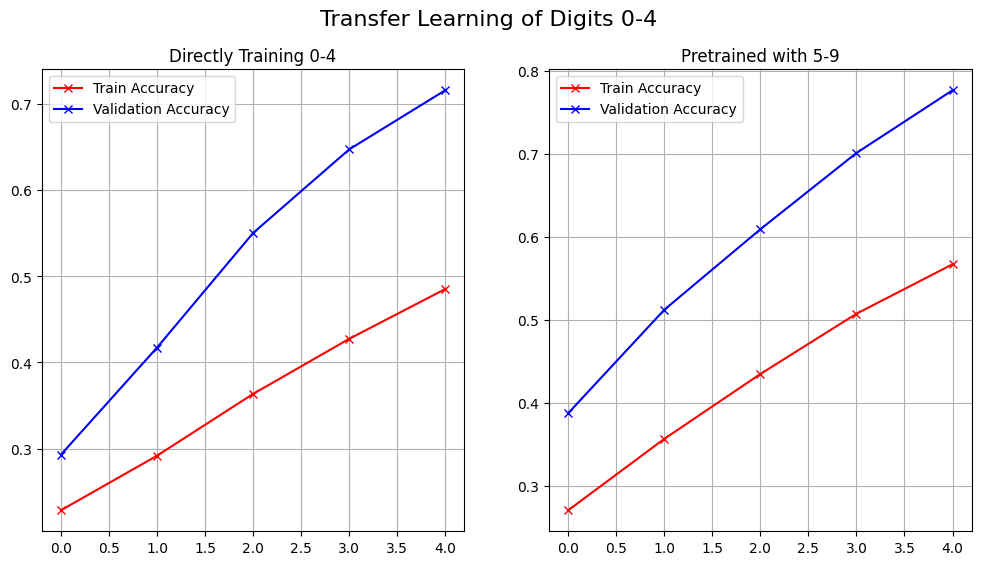

In [34]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Transfer Learning of Digits 0-4 ', fontsize=16)
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist1_1.history["accuracy"],'r-x', label="Train Accuracy")
ax.plot(hist1_1.history["val_accuracy"],'b-x', label="Validation Accuracy")
ax.legend()
ax.set_title('Directly Training 0-4')
ax.grid(True)


ax = fig.add_subplot(1, 2, 2)
ax.plot(hist_1.history["accuracy"],'r-x', label="Train Accuracy")
ax.plot(hist_1.history["val_accuracy"],'b-x', label="Validation Accuracy")
ax.legend()
ax.set_title('Pretrained with 5-9')
ax.grid(True)

I compared the first training of the first model from the procedure that trains the model with digits 0-4 and the second training of the pretrained model from the supplementary. Both of them are trained with digits 0-4 but the latter is pretrained with digits 5-9. After 5 epochs, the pretrained model showed about 5% higher accuracy in both training and validation sets. Additionally, the pretrained model has a smoother line and does not show any sign of converging yet compared to directly training the model.


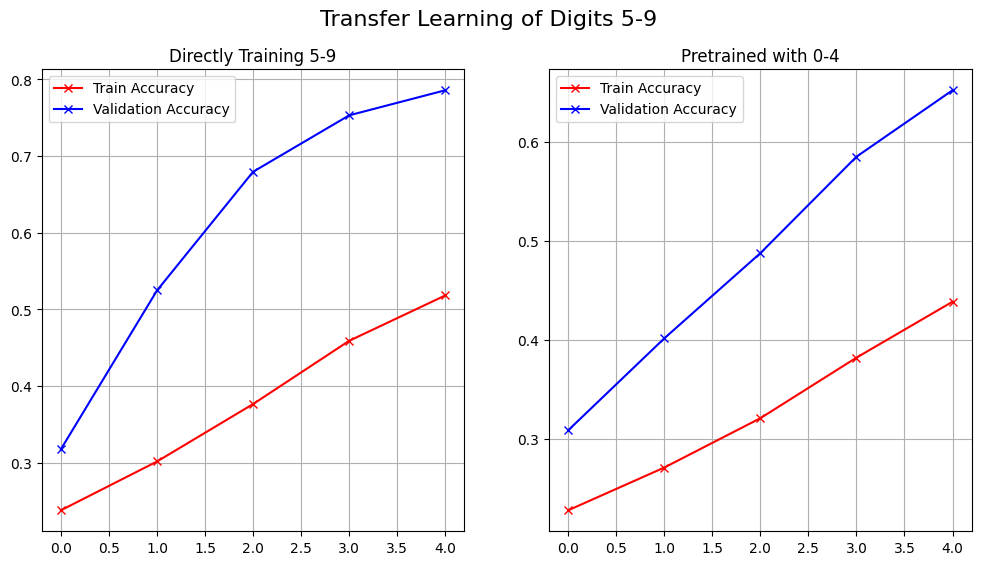

In [35]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Transfer Learning of Digits 5-9 ', fontsize=16)
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist.history["accuracy"],'r-x', label="Train Accuracy")
ax.plot(hist.history["val_accuracy"],'b-x', label="Validation Accuracy")
ax.legend()
ax.set_title('Directly Training 5-9')
ax.grid(True)


ax = fig.add_subplot(1, 2, 2)
ax.plot(hist1_2.history["accuracy"],'r-x', label="Train Accuracy")
ax.plot(hist1_2.history["val_accuracy"],'b-x', label="Validation Accuracy")
ax.legend()
ax.set_title('Pretrained with 0-4')
ax.grid(True)

I compared the first training of the second model from the supplementary and the second training of the pretrained model from the procedure. Both of them are trained with digits 5-9 but the latter is trained first with digits 0-4. After 5 epochs, the pretrained model has a lower accuracy in both training and validation sets compared to directly training them. However, its plot is more smooth and does not show any sign of converging yet. This means that it can be train more to increase its accuracy.


Text(0.5, 1.0, 'Models for (5-9)')

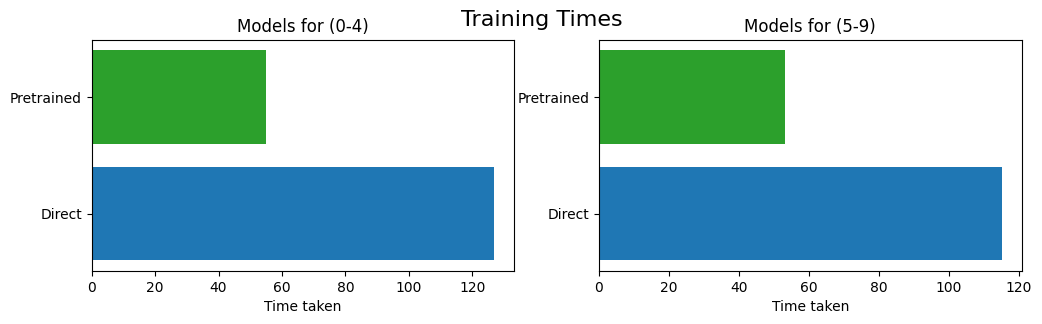

In [32]:
labels = ['Direct','Pretrained']
colors = ['#1f77b4','#2ca02c']

fig = plt.figure(figsize=(12, 3))
fig.suptitle('Training Times', fontsize=16)

samples = [model1_time_1.seconds, model_time_1.seconds]
ax = fig.add_subplot(1, 2, 1)
ax.barh(labels, samples, color=colors)
plt.xlabel('Time taken')
ax.set_title('Models for (0-4)')

samples = [model_time.seconds, model1_time_2.seconds]
ax = fig.add_subplot(1, 2, 2)
ax.barh(labels, samples, color=colors)
plt.xlabel('Time taken')
ax.set_title('Models for (5-9)')


The pretrained model in both cases have lower training time compared to directly training them. Directly training them doubles the amount of time in training. Transfer learning consumed less training.


#### Conclusion


Transfer learning involves taking a pre-trained model and fine-tuning it with a smaller dataset for a related task. It aims to reduce training time and improve model's performance in a limited dataset.

In the activity, it showed that transfer learning can increase the accuracy and lower the loss. Although it cannot always increase its performance as shown in the second case from the supplementary. Nonetheless, training time can be reduced significantly as the layers already learned the patterns and only the final layers are being modified by the back propagation. The pretrained model also showed a smoother metrics plot. Transfer learning can boost the performance of the model in limited time and data.
